<a href="https://colab.research.google.com/github/iljimae13/EksplorasiHyperparameterCNNdanNeuralNetwork./blob/main/TugasRegresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data di Googgle Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import library Pandas
Library Pandas biasa digunakan untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya

In [2]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Program/Digit/housing.csv")
data

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Load data ke dalam dataframe
column_names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('/content/drive/MyDrive/Program/Digit/housing.csv',names=column_names, header=None, delim_whitespace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.shape

(506, 14)

In [8]:
X = df.drop('MEDV',axis=1)
y = df['MEDV']
X.shape, y.shape

((506, 13), (506,))

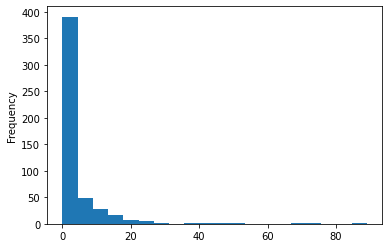

In [9]:
#Histogram
df['CRIM'].plot.hist(bins=20);

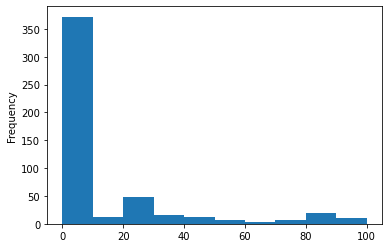

In [10]:
df['ZN'].plot.hist();

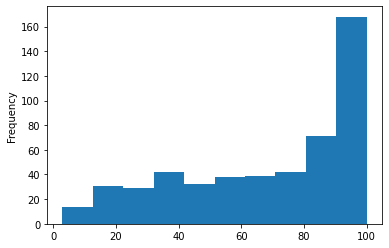

In [11]:
df['AGE'].plot.hist();

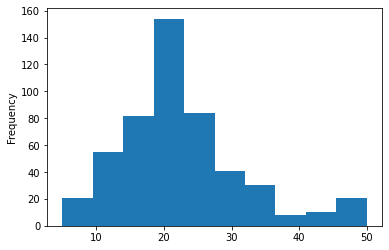

In [12]:
df['MEDV'].plot.hist();

In [13]:
df['MEDV'].mean()

22.532806324110698

In [14]:
df['RAD'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

In [15]:
df['CHAS'].unique()

array([0, 1])

In [16]:
df = pd.get_dummies(df, columns=['CHAS'],drop_first=True)

In [17]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_1
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0


In [18]:
#membagi data menjadi pelatihan
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [20]:
#Data Preprocessing Menggunakan Library Python Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (StandardScaler(), ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']),
    remainder='passthrough'
    )

ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE',
                                  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                                  'LSTAT'])])

In [21]:
ct.transform(X_train)
ct.transform(X_test)
ct.transform(X_valid);

In [22]:
import tensorflow as tf

In [28]:
#Membuat Model NN
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [29]:
model_1.compile(loss = tf.keras.losses.mean_absolute_error,
               optimizer = tf.keras.optimizers.Adam(lr=0.01),
               metrics=['mae'])

In [33]:
history_1 = model_1.fit(X_train, y_train, epochs=100, validation_data=(X_valid,y_valid))

Epoch 1/100
12/12 [==============================] - 0s 19ms/step - loss: 3.5696 - mae: 3.5696 - val_loss: 4.3572 - val_mae: 4.3572
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 3.8395 - mae: 3.8395 - val_loss: 3.7198 - val_mae: 3.7198
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 3.5001 - mae: 3.5001 - val_loss: 3.6144 - val_mae: 3.6144
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 3.6271 - mae: 3.6271 - val_loss: 4.2977 - val_mae: 4.2977
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 3.7771 - mae: 3.7771 - val_loss: 3.7148 - val_mae: 3.7148
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 3.5286 - mae: 3.5286 - val_loss: 4.1179 - val_mae: 4.1179
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 3.4512 - mae: 3.4512 - val_loss: 3.9520 - val_mae: 3.9520
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 3.5103 - 

In [32]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                140       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


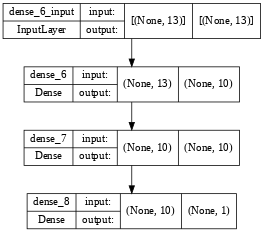

In [37]:
#visualisasi model
model_1_viz = tf.keras.utils.plot_model(model_1,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_1_viz

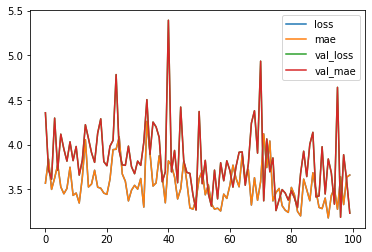

In [38]:
pd.DataFrame(history_1.history).plot();

In [39]:
#evaluasi model 
model_1.evaluate(X_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 2.9905 - mae: 2.9905


[2.9905169010162354, 2.9905169010162354]

In [40]:
y_pred = model_1.predict(X_test)

In [41]:
import matplotlib.pyplot as plt

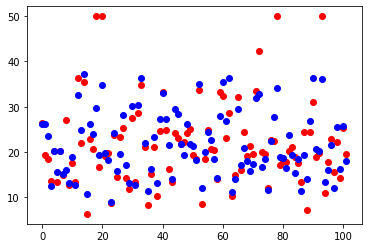

In [42]:
plt.figure()
plt.scatter(range(len(y_test)),y_test,color='red')
plt.scatter(range(len(y_pred)),y_pred,color='blue');